# Robustness Testing of Current Workflow

## Initialisation

In [25]:
import os

path = os.getcwd()
# find the string 'project' in the path, return index
index_project = path.find('project')
# slice the path from the index of 'project' to the end
project_path = path[:index_project+7]
# set the working directory
os.chdir(project_path+'\src')
print(f'Project path set to: {os.getcwd()}')

Project path set to: c:\Github\new-peak-project\src


In [26]:
from dotenv import dotenv_values
config = dotenv_values(".env")
print(config["DATA_PATH"])


I:\My Drive\DAWSON PHD PROJECT\Biomarker Data Repository\data\new-peak-project\experiments


In [27]:
from models.ModelBuilder import ModelBuilder
from models.Reaction import Reaction
from models.ReactionArchtype import ReactionArchtype
from models.ArchtypeCollections import *
from models.Utils import *

import matplotlib.pyplot as plt
import seaborn as sns
import roadrunner
import numpy as np
import pandas as pd

# import scikit-learn
from sklearn.linear_model import LinearRegression
# tree models and support vector machines
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# import pearson correlation
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from copy import deepcopy

## Testing 

In [28]:
import os 

### parameters 

notebook_name = 'testing-1'

## Generation of ground truth model 

model_name = 'v3_small_model_52'
o_random_seed = 5
no_observable_species = 5
no_feedback_regulations = 2
specie_value_range = (5, 5000)
param_range = (0.1, 10)
param_multiplier_range = (0.7, 1.3)


## Simulation parameters 

simulation_time = 500 
simulation_step = 100

## Feature data generation 

feature_generation_method = 'uniform'
feature_generation_extra_params = {'min': 0.1, 'max': 10}
feature_generation_size = 1000 
feature_generation_seed = 50 # if -1 then 'o_random_seed' is used
if feature_generation_seed == -1:
    feature_generation_seed = o_random_seed
    
## Data engineering parameters

# Suboptimal Model Generation 

'''
Options: 
- 'feedback_prune': removes feedback regulations from the model 
'''

# Engineering Feature Data 

data_engineering_method = 'dynamic_feature'
''' 
Options: 
- 'last_time_point' : only the last time point of the phosphorylated species is used
- 'dynamic_feature': computes the characteristic 'ten' dynamic feature for each specie data 
'''

## General parameters
parallelise = True
save_figures = True 
experiment_id = notebook_name + '_' + str(o_random_seed) + '_' + str(feature_generation_seed)
experiment_folder = config['DATA_PATH'] + '/' + experiment_id + '/'
if not os.path.exists(experiment_folder):
    os.makedirs(experiment_folder)
    
print(experiment_folder)

I:\My Drive\DAWSON PHD PROJECT\Biomarker Data Repository\data\new-peak-project\experiments/testing-1_5_50/


In [29]:
### Generate the ground truth model

model_spec = ModelSpecification()
model_spec.generate_specifications(o_random_seed, no_observable_species, no_feedback_regulations, verbose=0)
G0 = model_spec.generate_network(model_name, specie_value_range, param_range, param_multiplier_range, random_seed=o_random_seed, verbose=0)
runner = roadrunner.RoadRunner(G0.get_sbml_model())
res = runner.simulate(0, simulation_time, simulation_step)

In [30]:
print(model_spec)

A Species: ['A0', 'A1', 'A2', 'A3', 'A4']
B Species: ['B0', 'B1', 'B2', 'B3', 'B4']
C Species: ['C']
Regulations: [('B3', 'B1'), ('B0', 'B4'), ('A0', 'B0'), ('A1', 'B1'), ('A2', 'B2'), ('A3', 'B3'), ('A4', 'B4'), ('B0', 'C'), ('B1', 'C'), ('B2', 'C'), ('B3', 'C'), ('B0', 'C')]
Regulation Types: ['up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'down']
C Weak Stimulators: 0
C Strong Stimulators: 0
C Allosteric Inhibitors: 0
C Competitive Inhibitors: 0



In [31]:
print(G0.get_antimony_model())

model v3_small_model_52

J0: A0p -> A0; J0_Vmax*A0p/(J0_Km + A0p)
J1: A0 -> A0p; J1_Vmax*A0/(J1_Km + A0)
J2: A1p -> A1; J2_Vmax*A1p/(J2_Km + A1p)
J3: A1 -> A1p; J3_Vmax*A1/(J3_Km + A1)
J4: A2p -> A2; J4_Vmax*A2p/(J4_Km + A2p)
J5: A2 -> A2p; J5_Vmax*A2/(J5_Km + A2)
J6: A3p -> A3; J6_Vmax*A3p/(J6_Km + A3p)
J7: A3 -> A3p; J7_Vmax*A3/(J7_Km + A3)
J8: A4p -> A4; J8_Vmax*A4p/(J8_Km + A4p)
J9: A4 -> A4p; J9_Vmax*A4/(J9_Km + A4)
J10: B0p -> B0; J10_Vmax*B0p/(J10_Km + B0p)
J11: B0 -> B0p; (J11_Vmax+A0p*J11_Kw0)*B0/(J11_Km + B0)
J12: B1p -> B1; J12_Vmax*B1p/(J12_Km + B1p)
J13: B1 -> B1p; (J13_Vmax+B3p*J13_Kw0+A1p*J13_Kw1)*B1/(J13_Km + B1)
J14: B2p -> B2; J14_Vmax*B2p/(J14_Km + B2p)
J15: B2 -> B2p; (J15_Vmax+A2p*J15_Kw0)*B2/(J15_Km + B2)
J16: B3p -> B3; J16_Vmax*B3p/(J16_Km + B3p)
J17: B3 -> B3p; (J17_Vmax+A3p*J17_Kw0)*B3/(J17_Km + B3)
J18: B4p -> B4; J18_Vmax*B4p/(J18_Km + B4p)
J19: B4 -> B4p; (J19_Vmax+B0p*J19_Kw0+A4p*J19_Kw1)*B4/(J19_Km + B4)
J20: C -> Cp; (J20_Vmax+B0p*J20_Kw0+B1p*J20_Kw1+B2p

In [32]:
G0.set_state('A0', 10)

In [33]:
print(G0.get_antimony_model())

model v3_small_model_52

J0: A0p -> A0; J0_Vmax*A0p/(J0_Km + A0p)
J1: A0 -> A0p; J1_Vmax*A0/(J1_Km + A0)
J2: A1p -> A1; J2_Vmax*A1p/(J2_Km + A1p)
J3: A1 -> A1p; J3_Vmax*A1/(J3_Km + A1)
J4: A2p -> A2; J4_Vmax*A2p/(J4_Km + A2p)
J5: A2 -> A2p; J5_Vmax*A2/(J5_Km + A2)
J6: A3p -> A3; J6_Vmax*A3p/(J6_Km + A3p)
J7: A3 -> A3p; J7_Vmax*A3/(J7_Km + A3)
J8: A4p -> A4; J8_Vmax*A4p/(J8_Km + A4p)
J9: A4 -> A4p; J9_Vmax*A4/(J9_Km + A4)
J10: B0p -> B0; J10_Vmax*B0p/(J10_Km + B0p)
J11: B0 -> B0p; (J11_Vmax+A0p*J11_Kw0)*B0/(J11_Km + B0)
J12: B1p -> B1; J12_Vmax*B1p/(J12_Km + B1p)
J13: B1 -> B1p; (J13_Vmax+B3p*J13_Kw0+A1p*J13_Kw1)*B1/(J13_Km + B1)
J14: B2p -> B2; J14_Vmax*B2p/(J14_Km + B2p)
J15: B2 -> B2p; (J15_Vmax+A2p*J15_Kw0)*B2/(J15_Km + B2)
J16: B3p -> B3; J16_Vmax*B3p/(J16_Km + B3p)
J17: B3 -> B3p; (J17_Vmax+A3p*J17_Kw0)*B3/(J17_Km + B3)
J18: B4p -> B4; J18_Vmax*B4p/(J18_Km + B4p)
J19: B4 -> B4p; (J19_Vmax+B0p*J19_Kw0+A4p*J19_Kw1)*B4/(J19_Km + B4)
J20: C -> Cp; (J20_Vmax+B0p*J20_Kw0+B1p*J20_Kw1+B2p

In [34]:
runner = roadrunner.RoadRunner(G0.get_sbml_model())

In [35]:
# get all states in runner
states = runner.getFloatingSpeciesAmountsNamedArray()
print(states)

    A0p, A0, A1p,  A1, A2p,   A2, A3p,  A3, A4p,   A4, B0p,   B0, B1p,   B1, B3p, B2p,   B2,  B3, B4p,  B4,   C, Cp
 [[   0, 10,   0, 210,   0, 4204,   0, 152,   0, 4002,   0, 3776,   0, 4365,   0,   0, 3749, 783,   0, 717, 100,  0]]



In [36]:
specie_range = np.arange(1, 5000, 100)

def sensitivity_analysis(builder: ModelBuilder, specie_name, specie_range, simulation_time, simulation_step): 
    all_results = []
    for specie in specie_range: 
        builder.set_state(specie_name, specie)
        runner = roadrunner.RoadRunner(builder.get_sbml_model())
        res = runner.simulate(0, simulation_time, simulation_step)
        all_results.append(res)
    return all_results

all_results = sensitivity_analysis(G0, 'A0', specie_range, simulation_time, simulation_step)

        

In [37]:
result_1 = all_results[0]
# get the last time point of Cp 
state_result_1 = result_1['[Cp]']
print(state_result_1)

[ 0.         68.03572134 94.93194197 96.77778242 97.49958746 97.8709355
 98.00750043 97.95440959 97.85701243 97.77139398 97.7003148  97.64153792
 97.59293482 97.55273659 97.51948393 97.49197401 97.4692127  97.45037884
 97.43479453 97.42189785 97.41122582 97.4023939  97.39508477 97.38903598
 97.3840303  97.37988795 97.37645933 97.37362134 97.37127273 97.36932868
 97.36771977 97.36638659 97.36528471 97.36437314 97.36362057 97.36299851
 97.36248469 97.36205904 97.36170661 97.36141442 97.36117247 97.36097224
 97.3608067  97.36066994 97.3605571  97.36046442 97.36038731 97.36032483
 97.36027306 97.36022953 97.36019409 97.36016391 97.36013859 97.36011736
 97.36009939 97.36008431 97.36007177 97.36006146 97.36005298 97.36004602
 97.36004046 97.36003587 97.36003201 97.36002885 97.36002613 97.36002379
 97.36002179 97.36002009 97.36001844 97.36001698 97.36001578 97.36001499
 97.36001402 97.36001314 97.36001249 97.36001214 97.36001191 97.36001162
 97.36001145 97.36001142 97.36001152 97.36001159 97.

In [38]:
print(state_result_1[-1])

97.36001374704308


In [39]:
def extract_states_from_results(results, state_name, time_point): 
    all_states = []
    for result in results: 
        state = result[f'[{state_name}]']
        all_states.append(state[time_point])
    return all_states

Cp_final_states = extract_states_from_results(all_results, 'Cp', -1)
print(Cp_final_states)

[97.36001374704308, 51.400485336123886, 21.473937297769183, 12.608749292643694, 10.840462759808611, 10.406856956598848, 10.203926035132179, 10.082648926743671, 10.002033427141798, 9.944667274525617, 9.901800797792577, 9.868589954810467, 9.842128898298018, 9.820554452241089, 9.802644312788546, 9.787543366852075, 9.774644944728, 9.763502800066885, 9.753785372848908, 9.745237915561281, 9.73766315359851, 9.730905292253988, 9.72484034614885, 9.71936810851184, 9.714405409201754, 9.709886014415044, 9.705753264800407, 9.70195992288443, 9.698466265718565, 9.695238437815267, 9.692247511586865, 9.68946850674295, 9.686880034948691, 9.684463425922278, 9.682202411312472, 9.680082589484597, 9.678091881303633, 9.676219226447222, 9.67445497507551, 9.67279119964103, 9.671220658111663, 9.669737392812587, 9.668336415513938, 9.667013402548966, 9.665766216966123, 9.66459233062314, 9.663491048963019, 9.662462018971055, 9.661505582056844, 9.660622482910584]


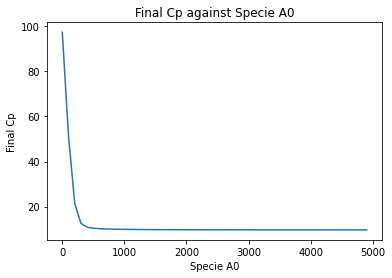

In [40]:
# plot Cp_final_states against specie_range
plt.plot(specie_range, Cp_final_states)
plt.xlabel('Specie A0')
plt.ylabel('Final Cp')
plt.title('Final Cp against Specie A0')
plt.show()

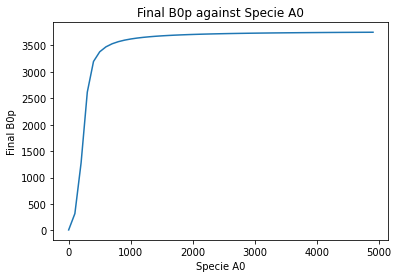

In [41]:
B0p_final_states = extract_states_from_results(all_results, 'B0p', -1)
# plot B0p_final_states against specie_range
plt.plot(specie_range, B0p_final_states)
plt.xlabel('Specie A0')
plt.ylabel('Final B0p')
plt.title('Final B0p against Specie A0')
plt.show()


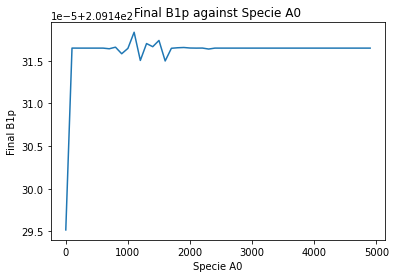

In [42]:
B1p_final_states = extract_states_from_results(all_results, 'B1p', -1)
# plot B0p_final_states against specie_range
plt.plot(specie_range, B1p_final_states)
plt.xlabel('Specie A0')
plt.ylabel('Final B1p')
plt.title('Final B1p against Specie A0')
plt.show()

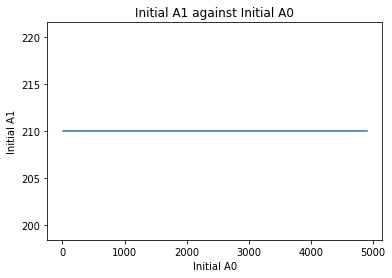

In [43]:
A1_final_states = extract_states_from_results(all_results, 'A1', 0)
# plot B0p_final_states against specie_range
plt.plot(specie_range, A1_final_states)
plt.xlabel('Initial A0')
plt.ylabel('Initial A1')
plt.title('Initial A1 against Initial A0')
plt.show()

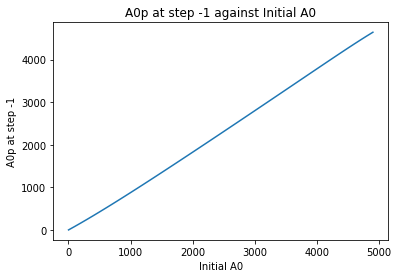

In [44]:
def plot_against_states(specie_range, all_results, state, time_point): 
    states = extract_states_from_results(all_results, state, time_point)
    plt.plot(specie_range, states)
    plt.xlabel('Initial A0')
    plt.ylabel(f'{state} at step {time_point}')
    plt.title(f'{state} at step {time_point} against Initial A0')
    plt.show()
    
plot_against_states(specie_range, all_results, 'A0p', -1)

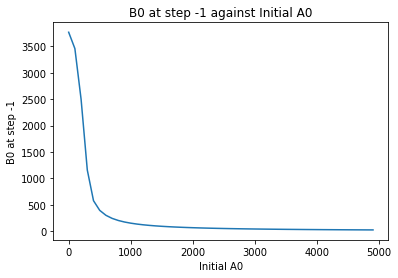

In [45]:
plot_against_states(specie_range, all_results, 'B0', -1)

In [46]:
all_init_species = ['A0', 'A1', 'A2', 'A3', 'A4', 'B0', 'B1', 'B2', 'B3', 'B4']
all_init_species_results = []
for init_species in all_init_species: 
    all_results = sensitivity_analysis(G0, init_species, specie_range, simulation_time, simulation_step)
    all_init_species_results.append(all_results)

# extract the last time point of Cp for each init species
Cp_final_states = []
for init_species in all_init_species_results: 
    Cp_final_states.append(extract_states_from_results(init_species, 'Cp', -1))
    





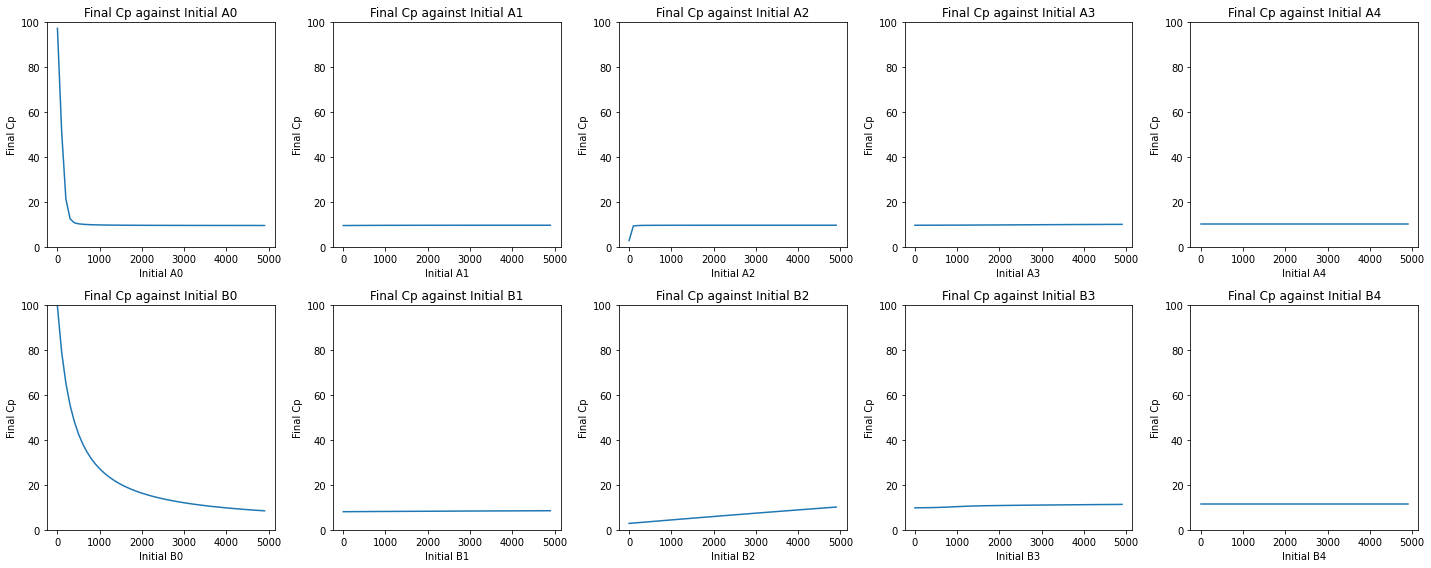

In [ ]:
# plot each init species against Cp_final_states in a multiplot
fig, axs = plt.subplots(2, 5, figsize=(20, 8))
axs = axs.flatten()
for i, init_species in enumerate(all_init_species):
    axs[i].plot(specie_range, Cp_final_states[i])
    axs[i].set_xlabel(f'Initial {init_species}')
    axs[i].set_ylabel(f'Final Cp')
    axs[i].set_title(f'Final Cp against Initial {init_species}')
    # make the title a bit higher to avoid overlapping with the significant figures of the y-axis
    axs[i].set_ylim(0, 100)
plt.tight_layout()
plt.show()
if save_figures: 
    fig.savefig(experiment_folder + 'Sensitivity_figure.png', dpi=300, bbox_inches='tight')
    plt.close(fig)

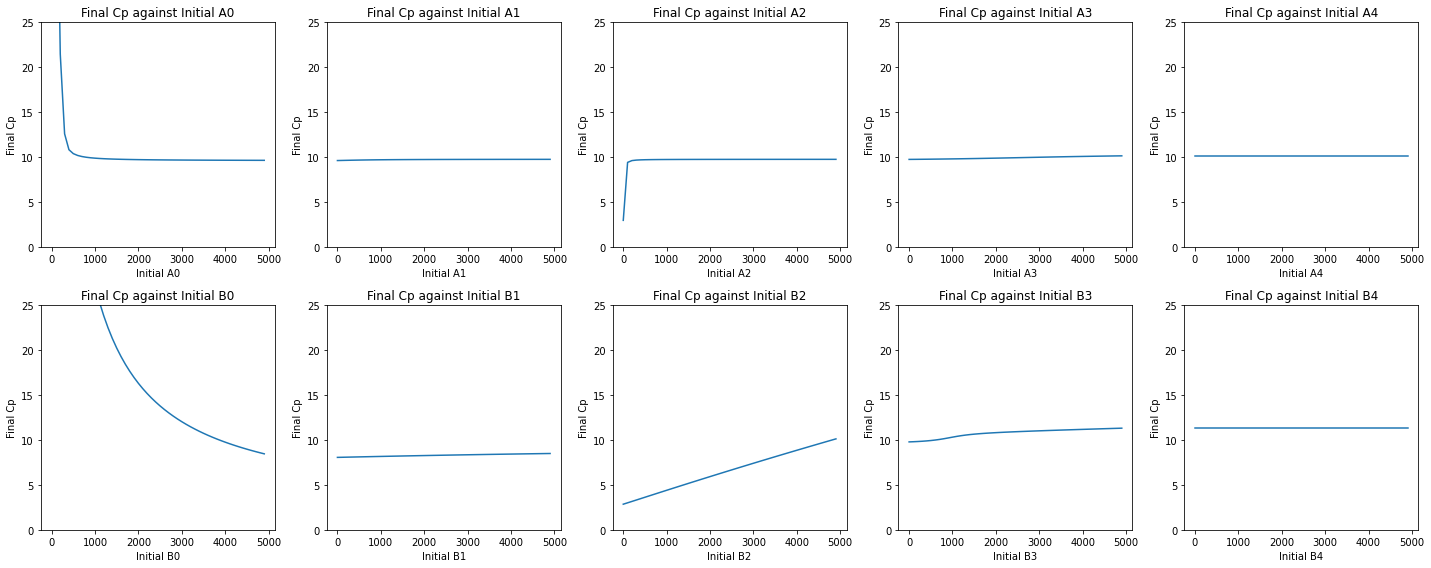

In [ ]:
# plot each init species against Cp_final_states in a multiplot
fig, axs = plt.subplots(2, 5, figsize=(20, 8))
axs = axs.flatten()
for i, init_species in enumerate(all_init_species):
    axs[i].plot(specie_range, Cp_final_states[i])
    axs[i].set_xlabel(f'Initial {init_species}')
    axs[i].set_ylabel(f'Final Cp')
    axs[i].set_title(f'Final Cp against Initial {init_species}')
    # make the title a bit higher to avoid overlapping with the significant figures of the y-axis
    axs[i].set_ylim(0, 25)
plt.tight_layout()
plt.show()



In [ ]:
# export the data into the folder as a pkl file 

import pickle
with open(experiment_folder + 'Cp_final_states_sensitivity.pkl', 'wb') as f:
    pickle.dump(Cp_final_states, f)
    
with open(experiment_folder + 'specie_range.pkl', 'wb') as f:
    pickle.dump(specie_range, f)
    